In [47]:
#2.6 Probability

#2.6.1 Basic Probability Theory
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

fair_probs = torch.ones([6]) / 6 #被選中的機率

pick_sum=11 #要選的數目
data_num=10 #要產生幾筆
print(multinomial.Multinomial(pick_sum, fair_probs).sample())
print(multinomial.Multinomial(pick_sum, fair_probs).sample((data_num,)))

tensor([2., 4., 0., 4., 0., 1.])
tensor([[2., 0., 3., 4., 1., 1.],
        [1., 2., 4., 1., 1., 2.],
        [3., 2., 2., 0., 1., 3.],
        [2., 2., 1., 3., 0., 3.],
        [4., 1., 2., 2., 1., 1.],
        [3., 2., 3., 0., 2., 1.],
        [1., 3., 1., 1., 4., 1.],
        [2., 1., 3., 0., 0., 5.],
        [1., 4., 1., 1., 1., 3.],
        [1., 1., 3., 2., 3., 1.]])


In [40]:
# Store the results as 32-bit floats for division
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # Relative frequency as the estimate

tensor([0.1650, 0.1740, 0.1680, 0.1580, 0.1730, 0.1620])

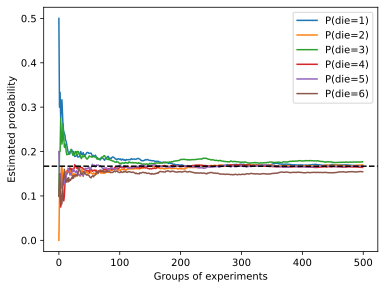

In [41]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,)) #產生500筆資料
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();